✅ Dataset Loaded Successfully
Shape: (20640, 9)

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  

✅ Model Evaluation:
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared Score (R²): 0.58

🔹 Sample Predictions:
Actual: 0.48, Predicted: 0.72
Actual: 0.46, Predicted: 1.76
Actual: 5.00, Predicted: 2.71
Actual: 2.19, Predicted: 2.84
Actual: 2.78, Predicted: 2.60


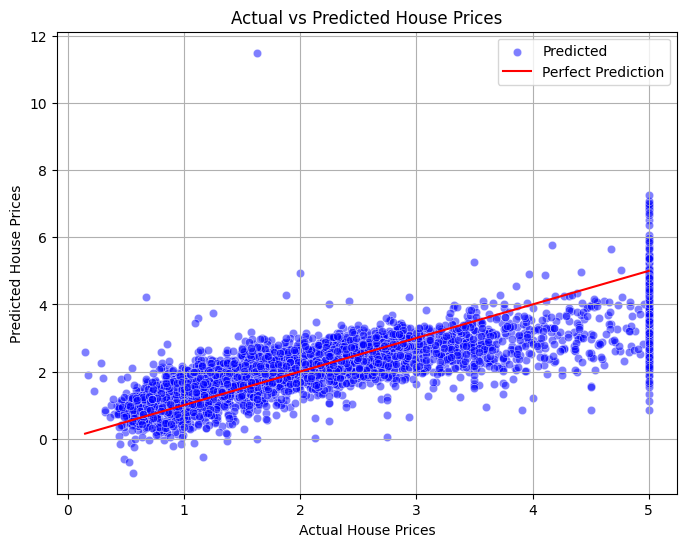


✅ Model saved as 'house_price_model.pkl'
✅ Dataset saved as 'house_price_dataset.csv'


In [21]:
# -----------------------------
# 1. Import required libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving the model

# -----------------------------
# 2. Load the dataset
# -----------------------------
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# -----------------------------
# 3. Split data into features and target
# -----------------------------
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# -----------------------------
# 4. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train the model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 6. Predict on test data
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 7. Evaluate the model
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared Score (R²):", round(r2, 2))

# Show first 5 actual vs predicted values
print("\n🔹 Sample Predictions:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}")

# -----------------------------
# 8. Plot Actual vs Predicted
# -----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue", label="Predicted")
sns.lineplot(x=y_test, y=y_test, color="red", label="Perfect Prediction")  # 45° line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 9. Save the trained model and dataset
# -----------------------------
joblib.dump(model, "house_price_model.pkl")
df.to_csv("house_price_dataset.csv", index=False)
print("\n✅ Model saved as 'house_price_model.pkl'")
print("✅ Dataset saved as 'house_price_dataset.csv'")
